In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [ ]:
PC_2d_Norm = np.load('/content/drive/MyDrive/PC_2d_norm_cropped.npy')
PC_2d_Norm.shape

(2000, 2000, 6)

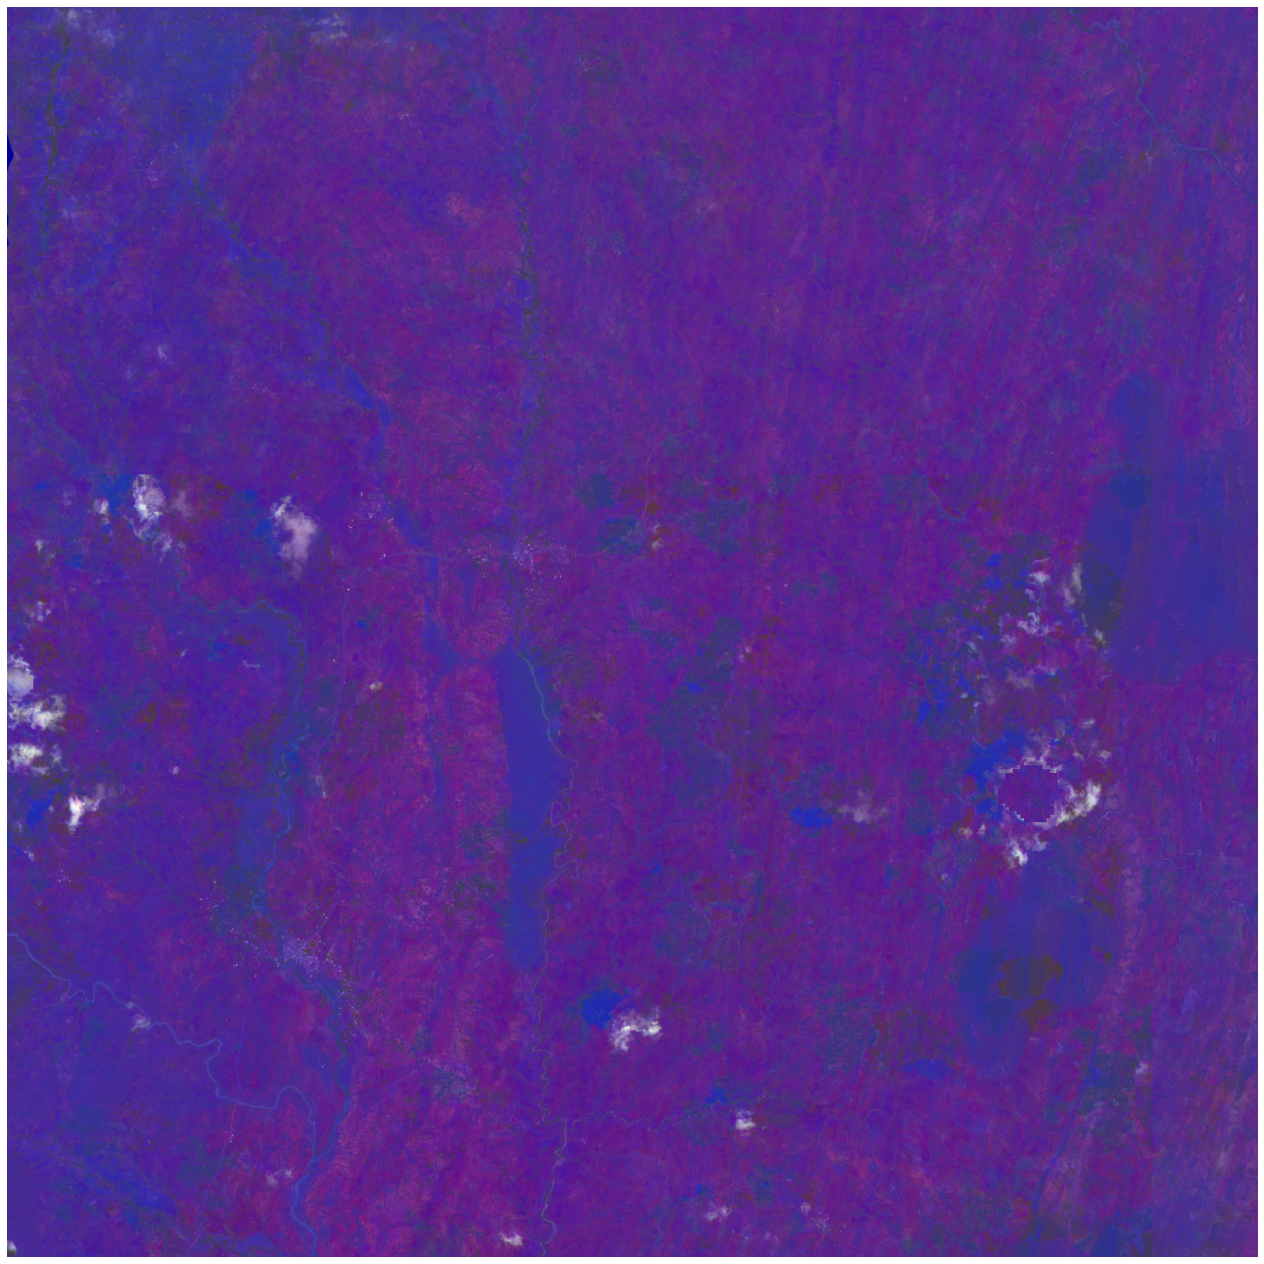

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(50,23),sharex='all', sharey='all')  
fig.subplots_adjust(wspace=0.1, hspace=0.15)
axes.imshow(PC_2d_Norm[:,:,0:3].astype(int))
axes.axis('off');

In [ ]:
# Taking the first three PC's to perform K means on it
img = PC_2d_Norm[:,:,0:3]

In [ ]:
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)

ELBOW METHOD TO DETERMINE THE NUMBER OF CLUSTERS


In [ ]:
wcss = []
from sklearn.cluster import KMeans
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Z)
    wcss.append(kmeans.inertia_)

In [ ]:
distances = []
for i in range(0,10):
    p1 = Point(initx=1,inity=wcss[0])
    p2 = Point(initx=10,inity=wcss[9])
    p = Point(initx=i+1,inity=wcss[i])
    distances.append(p.distance_to_line(p1,p2))

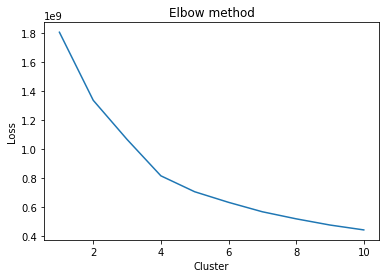

In [ ]:
import matplotlib.pyplot as plt
no_of_clusters = []
for i in range(1, 11):
    no_of_clusters.append(i)
plt.plot(no_of_clusters, wcss)
plt.title('Elbow method')
plt.xlabel('Cluster')
plt.ylabel('Loss')
plt.show()

#Number of clusters determined = 4

In [ ]:

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))



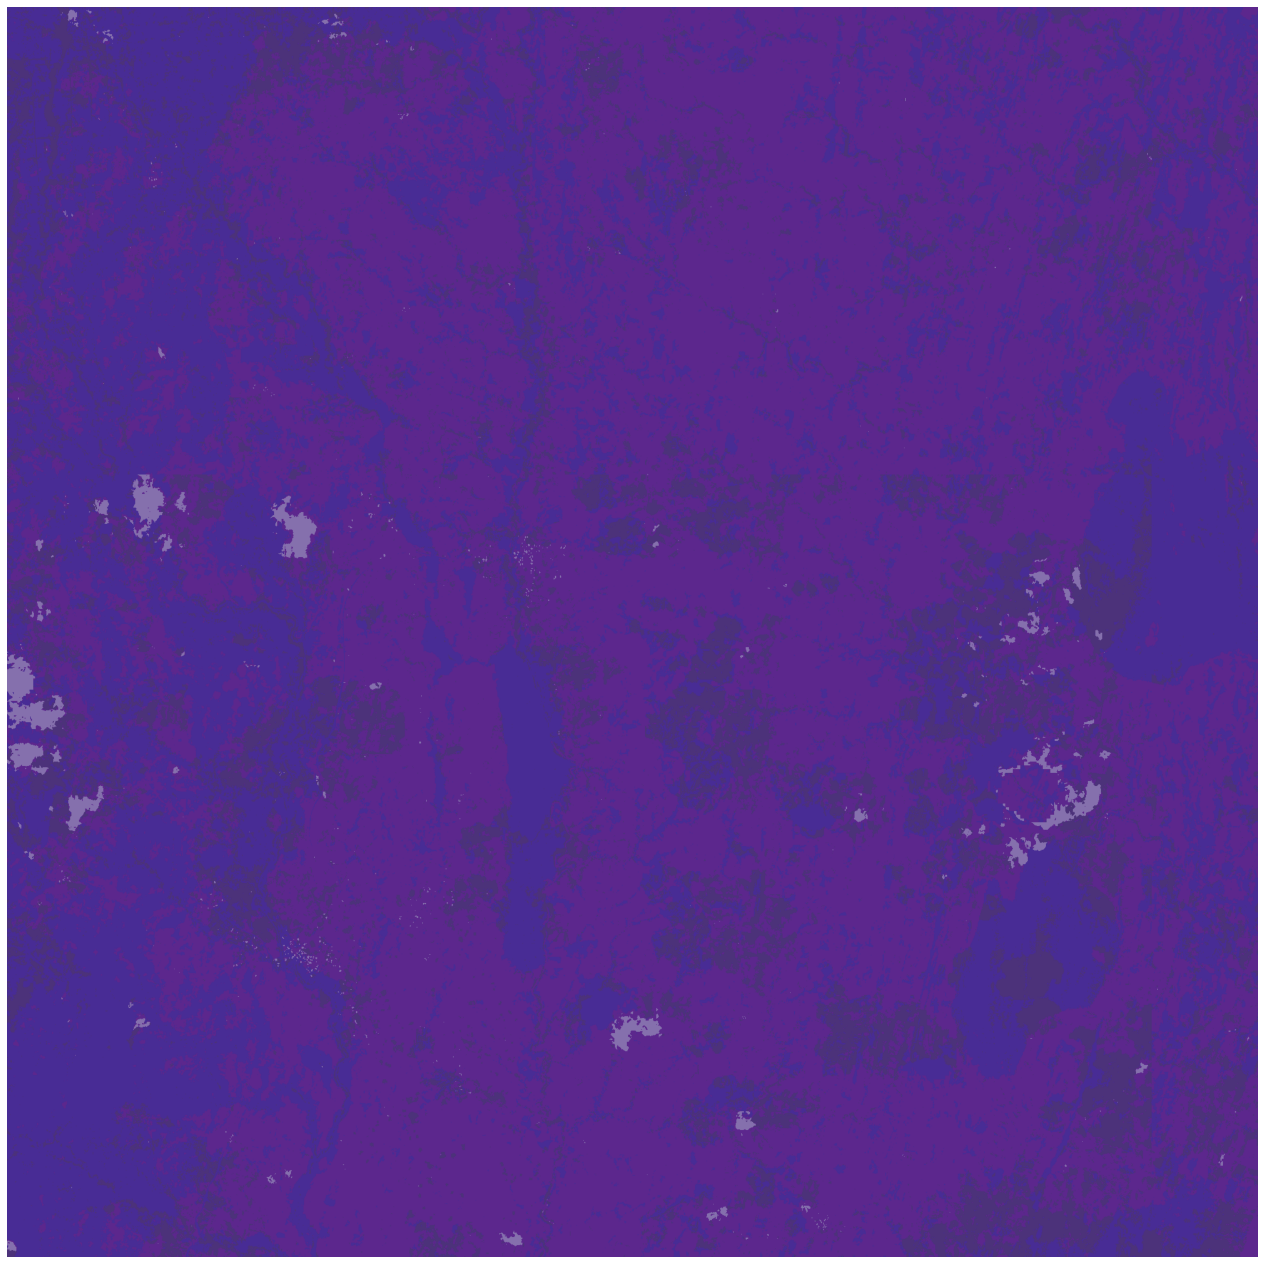

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(50,23),sharex='all', sharey='all')   #img_shape[0]/50,img_shape[1]/50
fig.subplots_adjust(wspace=0.1, hspace=0.15)
axes.imshow(res2.astype(int))
axes.axis('off');

In [ ]:
def centroid_histogram():
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(label)) + 1)
	(hist, _) = np.histogram(label, bins = numLabels)
	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()
	# return the histogram
	return hist

In [ ]:
def plot_colors(hist, centroids):
		# initialize the bar chart representing the relative frequency
		# of each of the colors
		bar = np.zeros((50, 300, 3), dtype = "uint8")
		startX = 0
		# loop over the percentage of each cluster and the color of
		# each cluster
		for (percent, color) in zip(hist, centroids):
				# plot the relative percentage of each cluster
				print(color)
				endX = startX + (percent * 300)
				cv2.rectangle(bar, (int(startX), 0), (int(endX), 50), color.astype("uint8").tolist(), -1)
				startX = endX
		
		# return the bar chart
		return bar

[ 92  39 141]
[133 112 173]
[ 72  44 149]
[ 76  50 122]


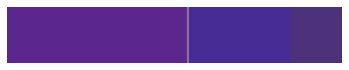

In [ ]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram()
bar = plot_colors(hist, center)
# show our color bar
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

#A visually more distinct view of the different clusters



In [ ]:
res2[np.where((res2==[ 92,  39, 141]).all(axis=2))] = [255,0,0]
res2[np.where((res2==[133, 112, 173]).all(axis=2))] = [0,255,0]
res2[np.where((res2==[ 72,  44, 149]).all(axis=2))] = [0,0,255]
res2[np.where((res2==[ 76,  50, 122]).all(axis=2))] = [255,255,0]

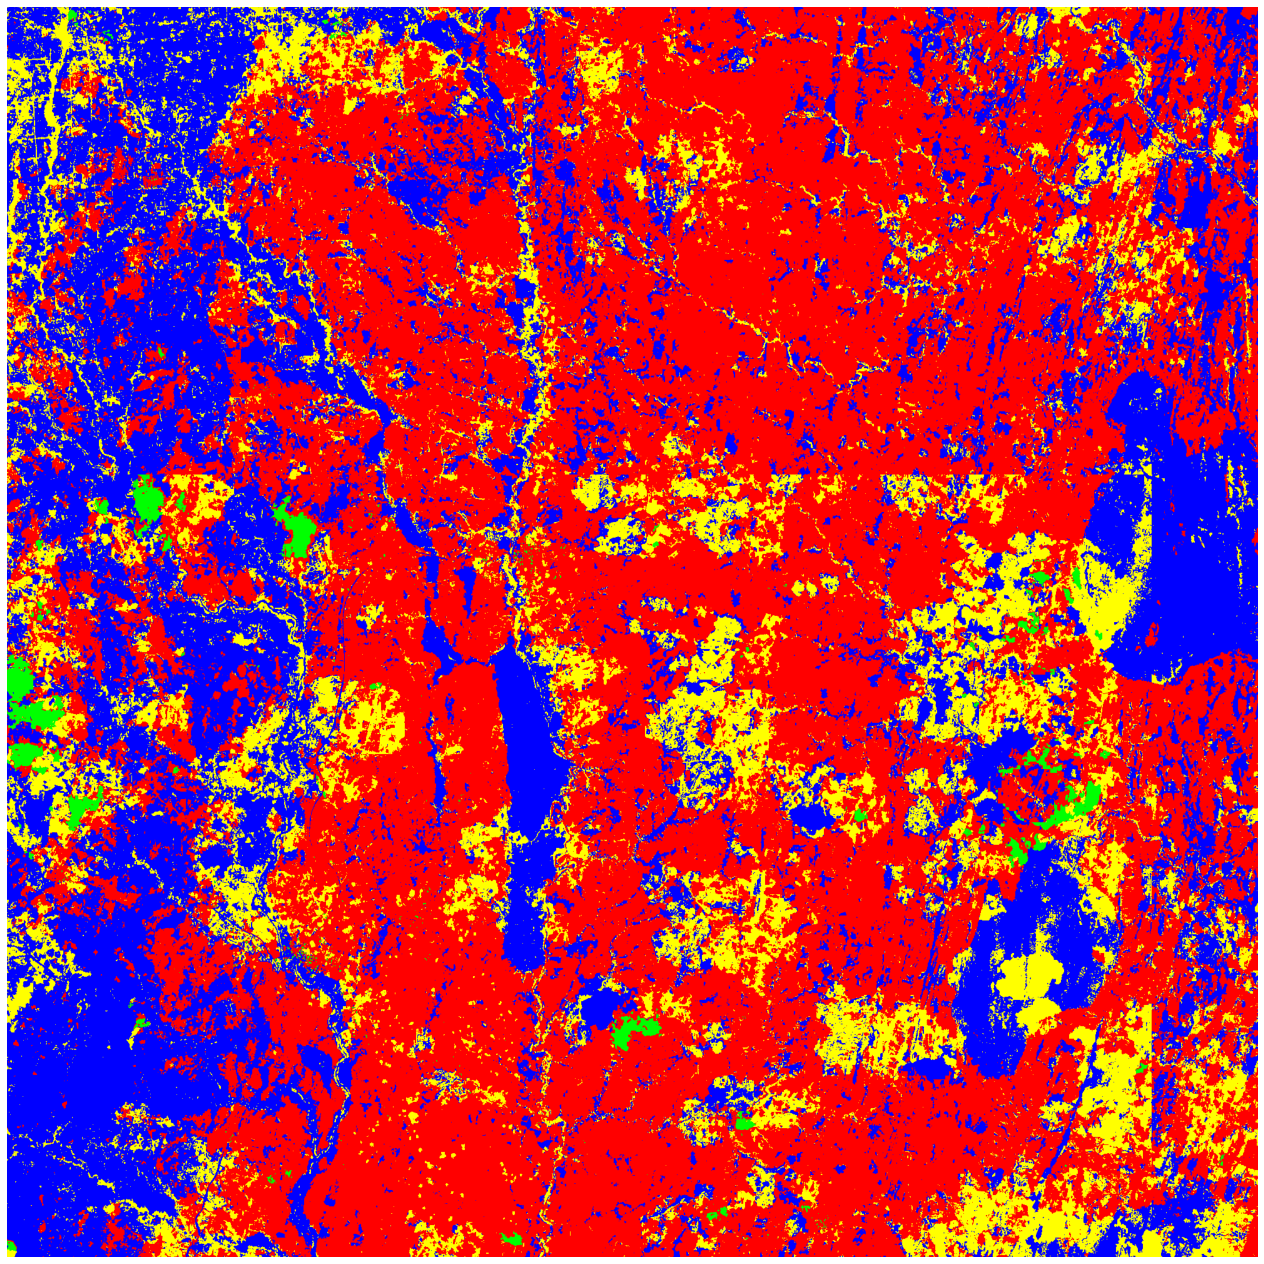

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(50,23),sharex='all', sharey='all')   #img_shape[0]/50,img_shape[1]/50
fig.subplots_adjust(wspace=0.1, hspace=0.15)
axes.imshow(res2.astype(int))
axes.axis('off');